In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from sklearn.decomposition import FastICA, PCA
from statistics import median
import os
import glob
from IPython.display import Audio

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline

In [4]:
# collect all the wav files
files = glob.glob('./data/mixed_data/*.wav')

In [5]:
samp_rates = []
sound_list = []

In [6]:
# collect sampling frequencies and audio signals
for f in files:
    samp_rate, sound = wavfile.read(f)
    samp_rates.append(samp_rate)
    sound_list.append(sound)

In [7]:
# store as numpy array
audio_array = np.array(sound_list)

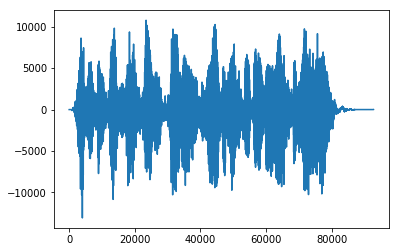

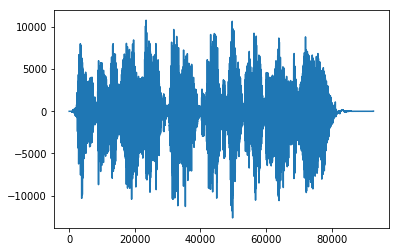

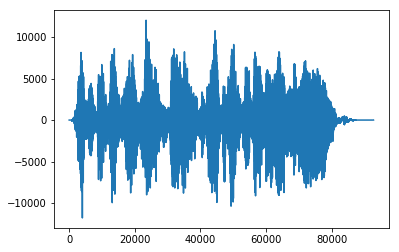

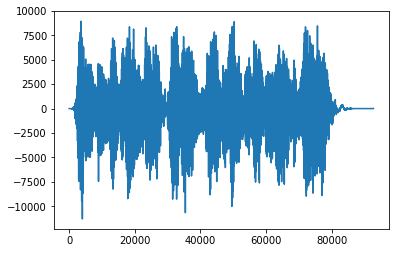

In [8]:
# listen and visualize sound waves as sanity check
for a in zip(samp_rates, sound_list):
    fig, ax = plt.subplots()
    ax.plot(a[1])
    Audio(a[1], rate=a[0])

In [9]:
ica = FastICA(n_components=4)

In [10]:
S_ = ica.fit_transform(audio_array.T)

In [11]:
for row in S_.T:
    Audio(row, rate=24000)

In [12]:
pca = PCA(n_components=4)

In [13]:
S_2 = pca.fit_transform(audio_array.T)

In [14]:
for row in S_2.T:
    Audio(row, rate=24000)